# SMAI Assignment - 2

## Question - `1` : Clustering

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

**About the dataset:**
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see from google.colab import drive
above), and represents the article of clothing. The rest of the columns contain 
the pixel-values of the associated image. You can check out the dataset here: https://www.kaggle.com/datasets/zalando-research/fashionmnist

1a) Load the dataset and use the K Means algorithm **(You are allowed to use the library)**. You need to find the optimal number of clusters using the
> i) elbow method
    >> Plot the graph between average distance and the number of clusters graph while using the elbow method. Report the optimal number of clusters found.

> ii) silhoette method
    >> Plot the graph between silhoutte score and number of clusters using silhoette method. Report the optimal number of clusters found.

1b) Experiment with different cluster initialisation methods [k-means++, forgy ("random" in sklearn)].


1c) Visualize the dataset to depict the clusters formed. (prefer T-SNE)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

Visualize the clusters obtained using these linkages and compare. 

</br>
</br>
</br>
</br>

**Part 3:**
</br>
In this part, we’ll implement kmeans to compress an image. In an original image each pixel has 3 8-bit integers, therefore the size of the image is **3 x height x width x 8**. Our task is to compress the image where it only comprises of **k** unique colors, where k = number of clusters formed by the algorithm where each pixel is a 3D datapoint. Therefore the new compressed image can be stored in **k x 24 + width x height x b**. (b -> number of bits used to represent the integer *k*, since each pixel will have a color value from 0 to k-1). Now your task is to experiment with different values of k (atleast 3) and show the compressed image along with the value of data reduction (in terms of bits). 

(an example image has been provided in the folder)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# !cp /content/drive/MyDrive/fashion-mnist_train.csv.zip .
# !cp /content/drive/MyDrive/fashion-mnist_test.csv.zip .
# !unzip /content/fashion-mnist_test.csv.zip -d /content/
# !unzip /content/fashion-mnist_train.csv.zip -d /content/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt 
import cv2


(60000, 784)
(10000, 784)
(10000,)
(60000,)


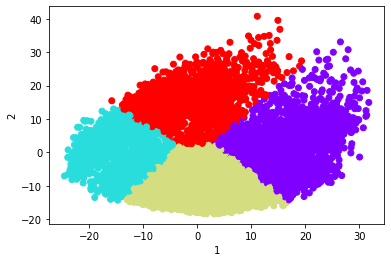

In [3]:
from keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
train_x=train_x.reshape(len(train_x),train_x[0].shape[0]*train_x[0].shape[1])
test_x=test_x.reshape(len(test_x),test_x[0].shape[0]*test_x[0].shape[1])
train_x=np.array(train_x)
test_x=np.array(test_x)
print(train_x.shape)
print(test_x.shape)
print(test_y.shape)
print(train_y.shape)
X = scaler.fit_transform(test_x)

from sklearn.decomposition import PCA
def pca_reduction(x,dim,k):
  pca=PCA(n_components=dim)
  reduced_data=pca.fit_transform(x)
  kmeans=KMeans(n_clusters=k,n_init=10)
  kmeans.fit(reduced_data)
  x_plot=reduced_data[:,0]
  y_plot=reduced_data[:,1]
  plt.scatter(x_plot, y_plot, c=kmeans.labels_, cmap='rainbow')
  plt.xlabel("1")
  plt.ylabel("2")
  plt.show()
  return reduced_data
pca_x= pca_reduction(X,2,4)
# you can performs your training on train/test dataset alone if there are computational issues

## Part1: K Means

In [ ]:
#implement elbow method from scratch
def elbow(x,init="k-means++"):
  sum_arr=[]
  n_cluster=10 # end of cluster number  
  for i in range(2,n_cluster+1):
    km_model=KMeans(n_clusters=i,random_state=41).fit(x)
    centroid_l=km_model.cluster_centers_
    assign_clusters=km_model.predict(x)
    # print(assign_clusters)
    sum=0
    for j in range(len(x)):
      # sum+=((x[j][0]-assign_clusters[j][0])**2)+((x[j][1]-assign_clusters[j][1])**2)
      # print(x[j]-centroid_l[assign_clusters[j]])
      sum+=np.sum((x[j]-centroid_l[assign_clusters[j]])**2)
    sum_arr.append(sum)
    # print(sum)
  plt.plot(np.arange(2,n_cluster+1),sum_arr)
  plt.xlabel("Clusters")
  plt.ylabel("Score")

  return sum_arr


[6579320.35359824,
 5910519.420182268,
 5442435.9429514585,
 5196969.582763258,
 4962418.50640992,
 4733833.180716504,
 4597651.334018763,
 4468347.928531159,
 4355470.352140751]

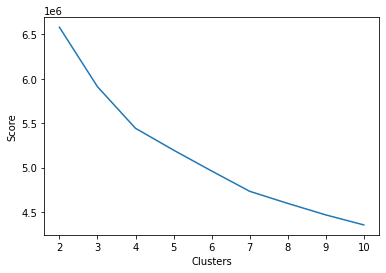

In [ ]:
elbow(X)

[6579320.35359824,
 5910519.420182268,
 5442435.9429514585,
 5196969.582763258,
 4962418.50640992,
 4733833.180716504,
 4597651.334018763,
 4468347.928531159,
 4355470.352140751]

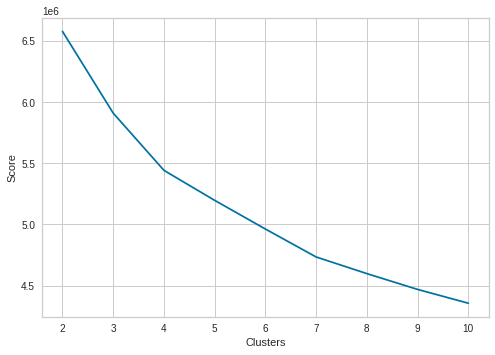

In [ ]:
elbow(X,'random')

In [ ]:
#implement silhouette method from scratch
# cluster_centers = kmeans.cluster_centers_

# img_arr=cluster_centers[indexes]

from sklearn.metrics import silhouette_score
def silhouette(x,n_cluster,init="k-means++"):
  sum_arr=[]
  for i in range(2,n_cluster+1):
    km_model=KMeans(n_clusters=i,n_init=10,init=init)
    assign_clusters=km_model.fit_predict(x)
    center=km_model.cluster_centers_
    # print(km_model.labels_)
    # print(assign_clusters)
    # print(center[assign_clusters].shape)
    score=silhouette_score(x,assign_clusters)
    sum_arr.append(score)
  plt.plot(np.arange(2,n_cluster+1),sum_arr)
  plt.xlabel("Clusters")
  plt.ylabel("Score")
  range_arr=np.arange(2,n_cluster+1)
  plt.show()
  return range_arr[np.argmax(sum_arr)]

Preparing dataset

Define Kmeans model

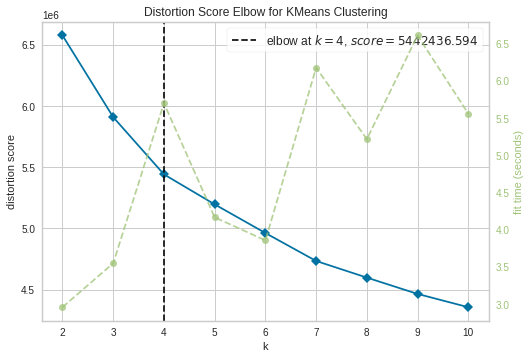

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# using the library 
# comparing from library
from yellowbrick.cluster import KElbowVisualizer
model = KElbowVisualizer(KMeans(), k=10)
model.fit(X)
model.show()

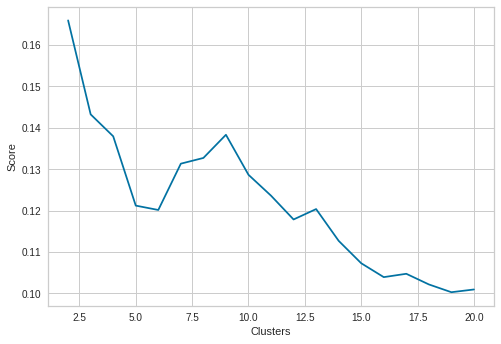

2


In [ ]:
optimal_clusters = silhouette(X,20)
print(optimal_clusters) # Got 2pca_x

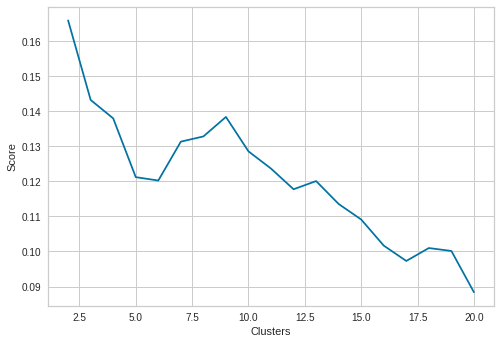

In [ ]:
# my model
optimal_clusters = silhouette(X,20,'random')


In [ ]:
print(optimal_clusters)

2


In [ ]:
# from matplotlib import pyplot as plt
# def print_plot(y):
#   x=np.arange(1,len(y))
#   plt.plot(x,y)
#   plt.xlabel('k')
#   plt.ylabel('sum')
#   plt.show()
# # print_plot(arr)
# # elbow method wrapped

## Part2: Hierarchical clustering

In [4]:
# implement hierarchical clustering ( you can use scikit module)
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# y,model_a=hierarchical_clustering(train_x,'single')




In [5]:
print(X.shape)

(10000, 784)


In [6]:
#visualize a dendogram
class Hierarichal():
  def __init__(self,n_cluster,x,linkage='ward'):
    self.k=n_cluster
    self.linkage=linkage
    self.x=x
    self.model=None
  def hierarchical_clustering(self):
    self.model = AgglomerativeClustering(n_clusters=self.k, affinity='euclidean', linkage=self.linkage,compute_distances=True)
    # y=clustering_model.fit_predict(x)
    # self.model=clustering_model
    self.model.fit(self.x)
    print(self.model.labels_)

    # return y,clustering_model
  def dendogram(self):
    linkage_matrix=sch.linkage(self.x,self.linkage)
    plt.figure(figsize=(20, 10))
    plt.xlabel('index')
    plt.ylabel('distance')
    sch.dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8.)

  def plot_clusters(self):
      plt.scatter(self.x[:, 0], self.x[:, 1], c = self.model.labels_, cmap='rainbow')
      plt.xlabel('1')
      plt.ylabel('2')
      plt.show()
hierarichal_model=Hierarichal(4,pca_x)
hierarichal_model.hierarchical_clustering()


[3 2 1 ... 1 1 3]


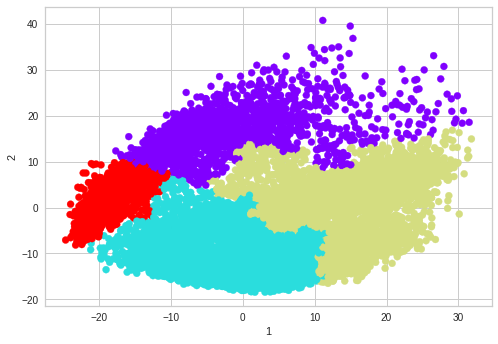

In [ ]:
hierarichal_model.plot_clusters()

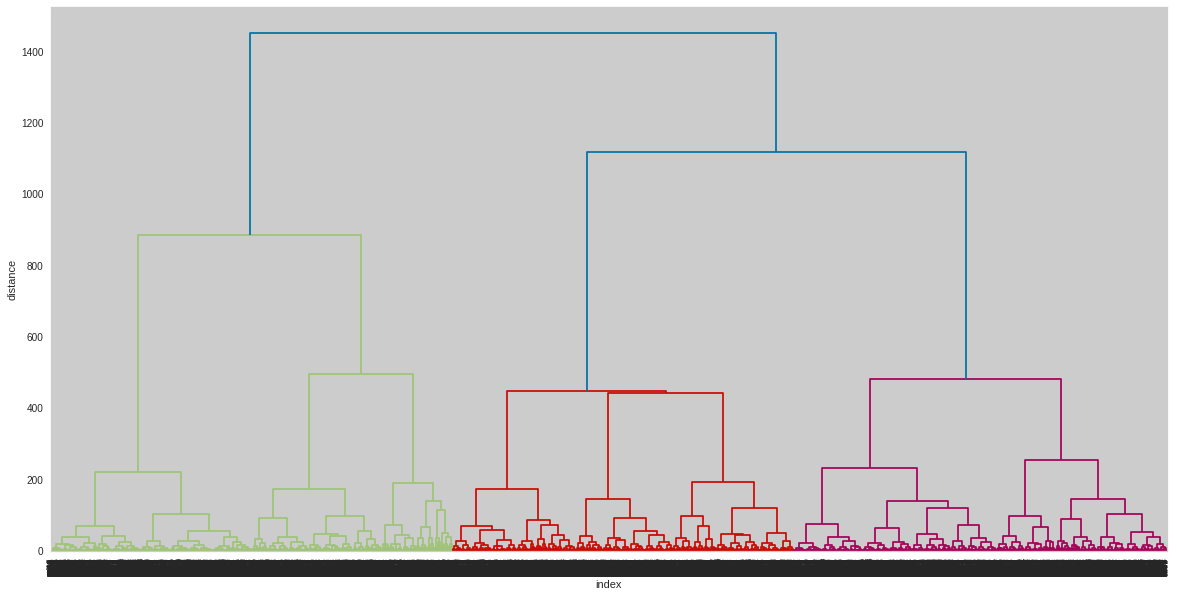

In [ ]:
hierarichal_model.dendogram()

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

Answer:Locate the nodes in the dendrogram with the greatest vertical distance between them, and then draw a horizontal line through the centre. The ideal number of clusters is the number of vertical lines that cross it (when affinity is calculated using the method set in linkage).





[1 1 1 ... 1 1 1]


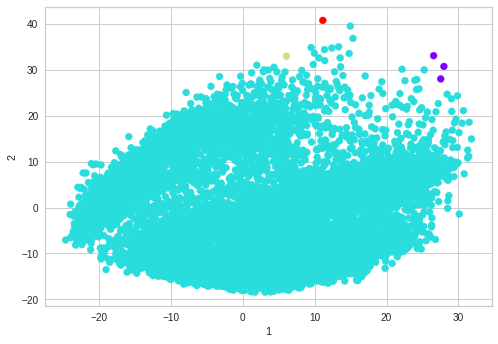

In [ ]:
#visualisation of clusters using single linkage and complete linkage

hierarichal_model_single=Hierarichal(4,pca_x,'single')
hierarichal_model_single.hierarchical_clustering()
hierarichal_model_single.plot_clusters()



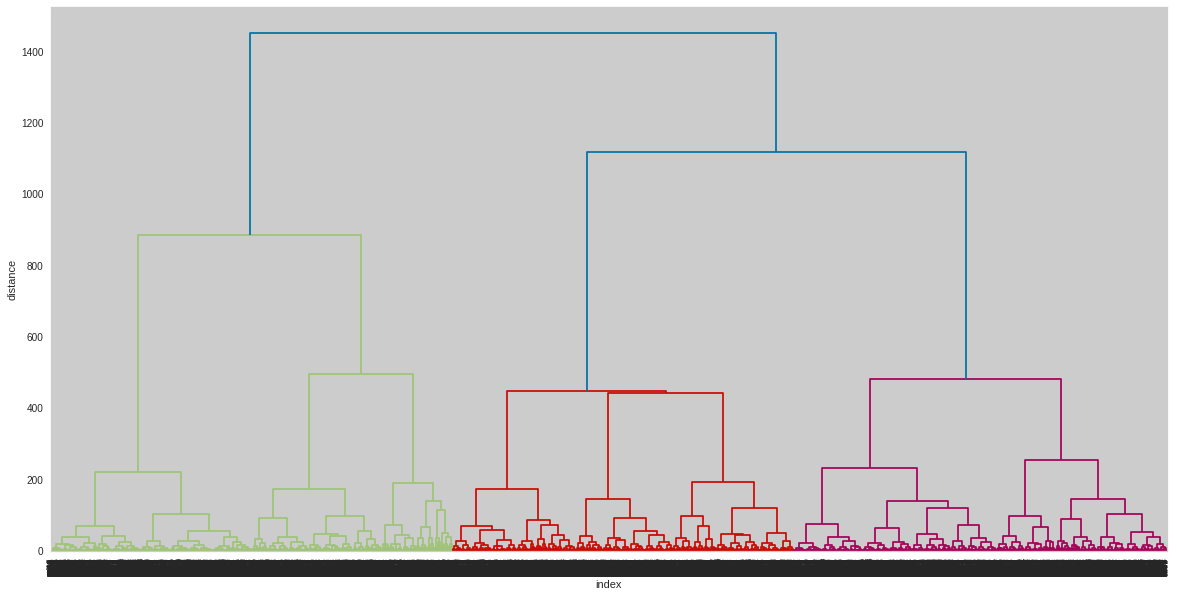

In [ ]:
hierarichal_model_single.dendogram()

[1 2 3 ... 1 3 1]


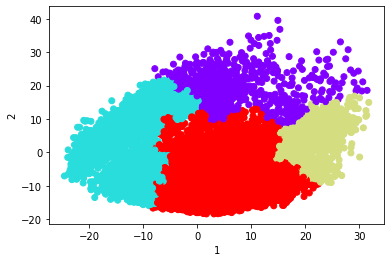

In [7]:
hierarichal_model_complete=Hierarichal(4,pca_x,'complete')
hierarichal_model_complete.hierarchical_clustering()

hierarichal_model_complete.plot_clusters()


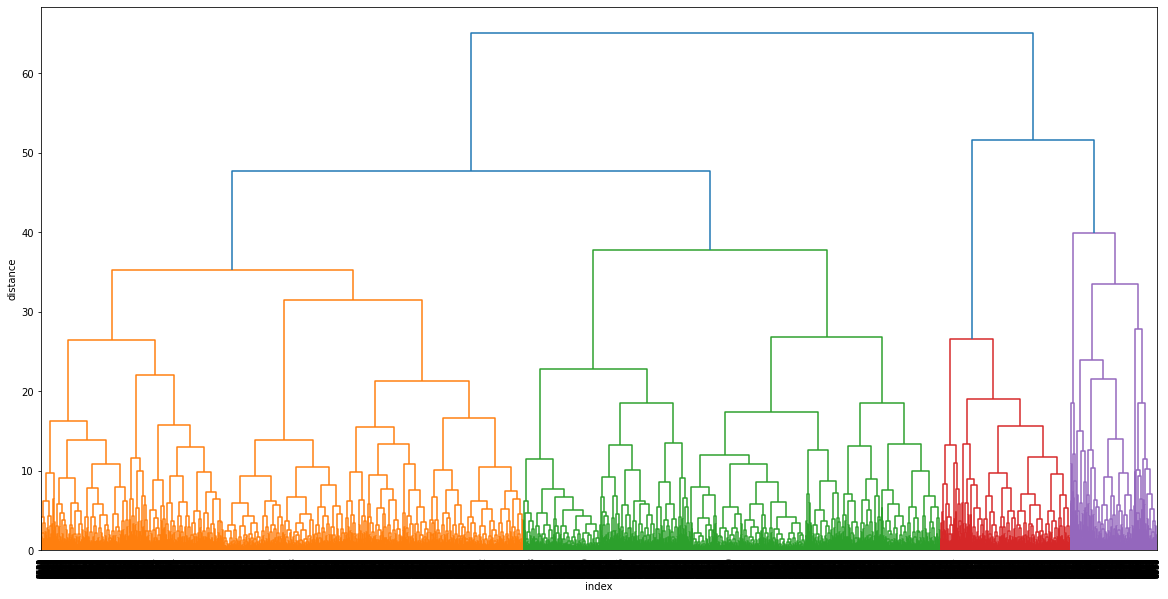

In [8]:
hierarichal_model_complete.dendogram()

**Question:** Mention the differences observed using single and complete linkage:

Answer:    Number of optimal clusters in this case is 3
    From the single-link dendogram and cluster map, we see that single link clustering produces long thin clusters since you make the link based on only 2 points.
    In complete link, clusters tend to be overly conservative, opposite to single link clustering. <br>
    1. Compared to complete links, single links tend to form larger clusters; in other words, the clusters appear to merge.
2. Single links operate more quickly because calculating distances is quicker.
3. The entire link clusters are simpler to read because they do not merge easily, but with a single link, we only get one big cluster.

## Part3: Image Compression

In [ ]:
# Boiler plate code
!cp /content/drive/MyDrive/dog.jpg .
import math
import cv2 
img = cv2.imread('/content/dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2_imshow(img)
img_size = img.shape
print(img_size)
og_size=img_size[0] * img_size[1]*24
# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])
print(X.shape)
def reconst_img(k):
  size= k*24 +(img_size[0] * img_size[1]*math.ceil(math.log2(k)))
  return (((og_size)-size)/og_size )*100

(635, 640, 3)
(406400, 3)


In [ ]:
from PIL import Image


# Get the labels


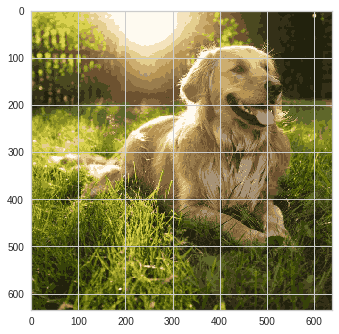

Data Reduction:  79.16174540682415


In [ ]:
kmeans = KMeans(n_clusters=20, n_init=10)
indexes=kmeans.fit_predict(X)
cluster_centers = kmeans.cluster_centers_
img_arr=cluster_centers[indexes]
# new_img = Image.fromarray(new_colors.reshape(img_size[0], img_size[1], img_size[2]).astype(np.uint8))
img_arr=img_arr.flatten()
final_img=img_arr.reshape(img_size[0],img_size[1],img_size[2]).astype(int)
plt.imshow(final_img, interpolation='nearest')
plt.show()
print('Data Reduction: ', reconst_img(20))


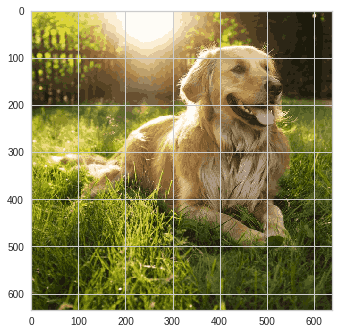

Data Reduction:  74.99015748031496


In [ ]:
kmeans = KMeans(n_clusters=40, n_init=10)
indexes=kmeans.fit_predict(X)
cluster_centers = kmeans.cluster_centers_

img_arr=cluster_centers[indexes]
img_arr=img_arr.flatten()
final_img=img_arr.reshape(img_size[0],img_size[1],img_size[2]).astype(int)
plt.imshow(final_img, interpolation='nearest')
plt.show()
print('Data Reduction: ', reconst_img(40))


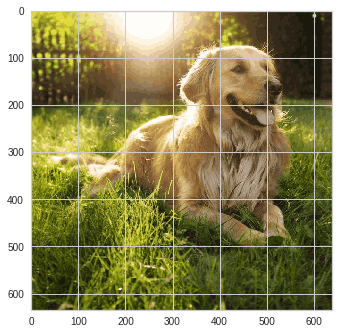

Data Reduction:  74.98523622047244


In [ ]:
kmeans = KMeans(n_clusters=60, n_init=10)
indexes=kmeans.fit_predict(X)
cluster_centers = kmeans.cluster_centers_

img_arr=cluster_centers[indexes]
img_arr=img_arr.flatten()
final_img=img_arr.reshape(img_size[0],img_size[1],img_size[2]).astype(int)
plt.imshow(final_img, interpolation='nearest')
plt.show()
print('Data Reduction: ', reconst_img(60))
